# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

__Вторая часть задания про градиентный бустинг и третья про SVM ждут вас в соседних ноутбуках.__

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 5 rows of our dataset.
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,794,87,41,76,165,67,7,148,45,19,140,171,327,152,72,7,13,188,195
1,763,102,52,98,225,71,10,214,31,24,164,228,682,199,71,0,16,187,196
2,249,85,34,53,127,58,6,116,58,17,121,137,197,127,70,3,20,185,189
3,72,92,39,91,191,62,8,176,37,21,137,196,466,151,67,3,23,192,200
4,471,104,55,109,230,67,12,218,30,24,174,230,706,226,67,8,22,191,202


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,426.539162,94.047359,45.138434,83.178506,169.990893,61.462659,8.570128,171.508197,40.387978,20.792350,148.613843,190.775956,454.154827,176.125683,72.562842,6.544627,12.761384,188.703097,195.482696
std,243.598698,8.452613,6.385356,16.002196,33.262749,7.529320,4.521350,34.491436,7.899732,2.709246,15.071492,32.392366,185.063955,33.445520,7.197562,5.054476,9.071466,6.126794,7.556730
min,2.000000,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,214.000000,87.000000,40.000000,70.000000,142.000000,57.000000,6.000000,148.000000,32.000000,19.000000,136.000000,168.000000,322.000000,151.000000,68.000000,2.000000,5.000000,184.000000,190.000000
50%,422.000000,93.000000,45.000000,81.000000,169.000000,61.000000,8.000000,158.000000,42.000000,20.000000,147.000000,180.000000,367.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,637.000000,101.000000,51.000000,100.000000,197.000000,65.000000,10.000000,205.000000,45.000000,23.000000,161.000000,219.000000,624.000000,201.000000,76.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,58.000000,110.000000,306.000000,126.000000,55.000000,265.000000,61.000000,29.000000,188.000000,288.000000,1018.000000,268.000000,119.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

**Нормализация признаков(они числовые и в разных масштабах)**

In [6]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Замена наименований классов на числовые(иначе неизвестно, что необходимо предсказывать)**

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

*https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html*

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
%matplotlib inline

y_train_label = label_binarize(y_train, classes=[0, 1, 2, 3])
y_test_label = label_binarize(y_test, classes=[0, 1, 2, 3])

n_classes = y_train_label.shape[1]

def get_metrics(clf, X_train, X_test):
    # Print accuracy, f1_score
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print('accuracy:', accuracy_score(y_test, y_pred))
    print('f1_score:', f1_score(y_test, y_pred, average = 'macro'))
    
def get_metrics_curve(clf, X_train, X_test):
    # Print accuracy, f1_score
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print('accuracy:', accuracy_score(y_test, y_pred))
    print('f1_score:', f1_score(y_test, y_pred, average = 'macro'))
    
    # Learn to predict each class against the other
    
    classifier = OneVsRestClassifier(clf)

    y_score = classifier.fit(X_train, y_train_label).predict_proba(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_label[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_label.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

accuracy: 0.797979797979798
f1_score: 0.77909307643653


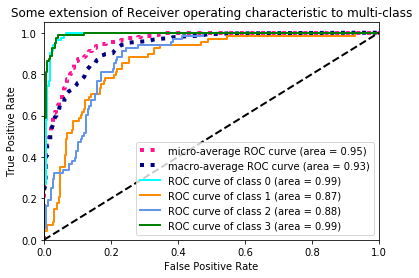

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_lr = {'penalty':('l1', 'l2'), 
            'C':np.linspace(0.01, 1, 15)}

lr = LogisticRegression(multi_class='multinomial', solver = 'saga', random_state = 42)

search_lr = GridSearchCV(estimator = lr, param_grid = param_lr, iid =True,
                         scoring = 'accuracy', cv = 5)

search_lr.fit(X_train_scaled, y_train);

get_metrics_curve(search_lr.best_estimator_, X_train_scaled, X_test_scaled)

#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

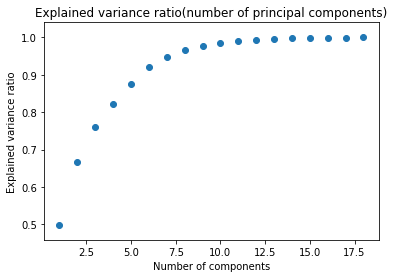

In [10]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

var = []
num_feat = X_train_scaled.shape[1]
n_comp = np.arange(1, num_feat)

for n in n_comp:
    pca = PCA(n_components=n, random_state = 42)
    pca.fit(X_train_scaled)
    var.append(sum(pca.explained_variance_ratio_))
    
plt.scatter(x = n_comp, y = var)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Explained variance ratio(number of principal components)')
plt.show()

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

**При n_comp=14 explained variance ratio = 99 %, а дальнейшее изменение мало.**

In [11]:
### YOUR CODE HERE
n_comp_opt = 14
pca = PCA(n_components = n_comp_opt, random_state = 42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

accuracy: 0.7710437710437711
f1_score: 0.7505000141569291


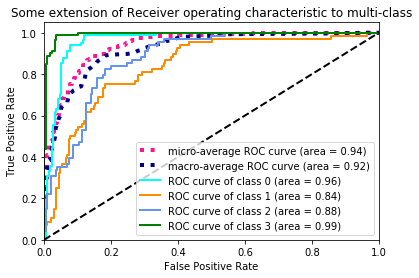

In [12]:
param_lr = {'penalty':('l1', 'l2'), 
            'C':np.linspace(0.01, 1, 15)
            }

lr = LogisticRegression(multi_class='multinomial', solver = 'saga', random_state = 42)

search_lr_pca = GridSearchCV(estimator = lr, param_grid = param_lr, iid =True,
                         scoring = 'accuracy', cv = 5)

search_lr_pca.fit(X_train_pca, y_train);


get_metrics_curve(search_lr_pca.best_estimator_, X_train_pca, X_test_pca)

#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

In [13]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier

param_tree = {'max_depth': np.arange(1, 100)}

**For scaled X**

accuracy: 0.7138047138047138
f1_score: 0.6842509397173812


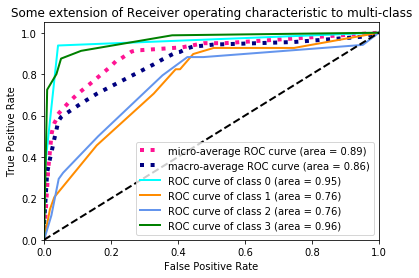

In [14]:
search_tree = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 42), iid = True,
                           scoring = 'accuracy', param_grid = param_tree, cv = 5)

search_tree.fit(X_train_scaled, y_train);

get_metrics_curve(search_tree.best_estimator_, X_train_scaled, X_test_scaled)

**For scaled_pca X**

accuracy: 0.6666666666666666
f1_score: 0.6583407105978061


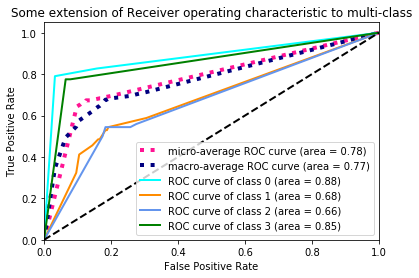

In [15]:
search_tree_pca = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 42), iid = True,
                               scoring = 'accuracy', param_grid = param_tree, cv = 5)

search_tree_pca.fit(X_train_pca, y_train);

get_metrics_curve(search_tree_pca.best_estimator_, X_train_pca, X_test_pca)

#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

In [16]:
def bagging_model(clf):
    
    f1_scores_train = []
    accuracy_train = []
    f1_scores_test = []
    accuracy_test = []

    n_est = np.arange(2, 51)

    for n in n_est:
        bag = BaggingClassifier(base_estimator=clf, n_estimators = n, bootstrap=True)
        bag.fit(X_train_pca, y_train)

        y_pred_train = bag.predict(X_train_pca)
        f1_scores_train.append(f1_score(y_train, y_pred_train, average = 'macro'))
        accuracy_train.append(accuracy_score(y_train, y_pred_train))

        y_pred = bag.predict(X_test_pca)
        f1_scores_test.append(f1_score(y_test, y_pred, average = 'macro'))
        accuracy_test.append(accuracy_score(y_test, y_pred))
    
    return f1_scores_train, accuracy_train, f1_scores_test, accuracy_test

In [17]:
# YOUR CODE HERE

from sklearn.ensemble import BaggingClassifier

lr = LogisticRegression(multi_class='multinomial', solver = 'saga',  
                        C = search_lr_pca.best_params_['C'], 
                        penalty = search_lr_pca.best_params_['penalty'],
                        random_state = 42)

f1_scores_train_lr, accuracy_train_lr, f1_scores_test_lr, accuracy_test_lr = bagging_model(lr)

In [18]:
tree = DecisionTreeClassifier(max_depth = search_tree_pca.best_params_['max_depth'],
                              random_state = 42)

f1_scores_train_tree, accuracy_train_tree, f1_scores_test_tree, accuracy_test_tree = bagging_model(tree)

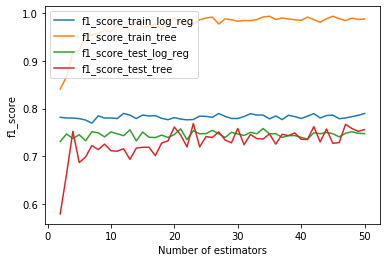

In [19]:
n_est = np.arange(2, 51)
plt.plot(n_est, f1_scores_train_lr, label = 'f1_score_train_log_reg')
plt.plot(n_est, f1_scores_train_tree, label = 'f1_score_train_tree')
plt.plot(n_est, f1_scores_test_lr, label = 'f1_score_test_log_reg')
plt.plot(n_est, f1_scores_test_tree, label = 'f1_score_test_tree')
plt.xlabel('Number of estimators')
plt.ylabel('f1_score')
plt.legend(loc="upper left")
plt.show()

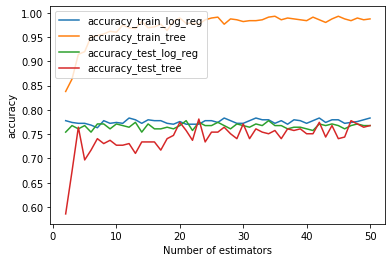

In [20]:
plt.plot(n_est, accuracy_train_lr, label = 'accuracy_train_log_reg')
plt.plot(n_est, accuracy_train_tree, label = 'accuracy_train_tree')
plt.plot(n_est, accuracy_test_lr, label = 'accuracy_test_log_reg')
plt.plot(n_est, accuracy_test_tree, label = 'accuracy_test_tree')
plt.xlabel('Number of estimators')
plt.ylabel('accuracy')
plt.legend(loc="upper left")
plt.show()

In [21]:
#LogisticRegression:
n_est_lr_opt = 10

In [22]:
#DecisionTreeClassifier:
n_est_tree_opt = 20

**Answer:**

**Параметры решающего дерева, подобранные в предыдущем пункте, в данном случае не являются оптимальными, так как нам нужны более переобученные деревья, чтобы в среднем был лучше результат**

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

In [23]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier

f1_scores_train_forest = []
f1_scores_test_forest = []
accuracy_train_forest = []
accuracy_test_forest = []

n_est = np.arange(1, 51)
for n in n_est:
    forest = RandomForestClassifier(n_estimators = n, random_state = 42)
    forest.fit(X_train_pca, y_train)
    
    y_pred_train = forest.predict(X_train_pca)
    f1_scores_train_forest.append(f1_score(y_train, y_pred_train, average = 'macro'))
    accuracy_train_forest.append(accuracy_score(y_train, y_pred_train))
    
    y_pred = forest.predict(X_test_pca)
    f1_scores_test_forest.append(f1_score(y_test, y_pred, average = 'macro'))
    accuracy_test_forest.append(accuracy_score(y_test, y_pred))

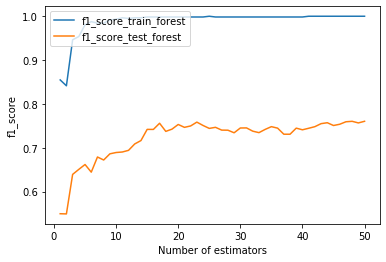

In [24]:
plt.plot(n_est, f1_scores_train_forest, label = 'f1_score_train_forest')
plt.plot(n_est, f1_scores_test_forest, label = 'f1_score_test_forest')
plt.xlabel('Number of estimators')
plt.ylabel('f1_score')
plt.legend(loc="upper left")
plt.show()

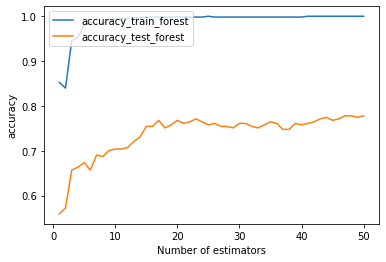

In [25]:
plt.plot(n_est, accuracy_train_forest, label = 'accuracy_train_forest')
plt.plot(n_est, accuracy_test_forest, label = 'accuracy_test_forest')
plt.xlabel('Number of estimators')
plt.ylabel('accuracy')
plt.legend(loc="upper left")
plt.show()

**RandomForestClassifier: n_estimators_opt = 30,
это число больше опт. числа деревьев для бэггинга, так как для бэггинга деревьев мы подбирали параметры**

In [26]:
n_est_forest_opt = 30

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [27]:
# YOUR CODE HERE
from sklearn.utils import shuffle

X_shuffle, y_shuffle = shuffle(X_train_pca, y_train, random_state=0)
len_part =len(X_train_pca) // 10

X_parts = []
y_parts = []
for i in range(1, 11):
    X_parts.append(X_shuffle[(i-1)*len_part:i*len_part])
    y_parts.append(y_shuffle[(i-1)*len_part:i*len_part])

In [28]:
def get_results_4(clf):
    f1_score_train = []
    f1_score_test = []
    accuracy_train = []
    accuracy_test = []
    
    X_train_part = X_parts[0]
    y_train_part = y_parts[0]
    
    for i in range(10):
        clf.fit(X_train_part, y_train_part)
    
        y_pred_train = clf.predict(X_train_part)
        f1_score_train.append(f1_score(y_train_part, y_pred_train, average = 'macro'))
        accuracy_train.append(accuracy_score(y_train_part, y_pred_train))
        
        y_pred_test = clf.predict(X_test_pca)
        f1_score_test.append(f1_score(y_test, y_pred_test, average = 'macro'))
        accuracy_test.append(accuracy_score(y_test, y_pred_test))
        
        if i != 9:
            X_train_part = np.concatenate((X_train_part, X_parts[i+1]))
            y_train_part = np.concatenate((y_train_part, y_parts[i+1]))
            
    return f1_score_train, f1_score_test, accuracy_train, accuracy_test

In [29]:
lr = LogisticRegression(multi_class='multinomial', solver = 'saga',  
                        C = search_lr_pca.best_params_['C'], 
                        penalty = search_lr_pca.best_params_['penalty'],
                        random_state = 42)

tree = DecisionTreeClassifier(max_depth = search_tree_pca.best_params_['max_depth'],
                              random_state = 42)

lr_4_bg = LogisticRegression(multi_class='multinomial', solver = 'saga',  
                             C = search_lr_pca.best_params_['C'], 
                             penalty = search_lr_pca.best_params_['penalty'],
                             max_iter = 250,
                             random_state = 42)

bag_lr = BaggingClassifier(base_estimator = lr_4_bg, n_estimators = n_est_lr_opt, 
                           bootstrap=True, random_state = 42)

tree_4_bg = DecisionTreeClassifier(max_depth = 100, random_state = 42)

bag_tree = BaggingClassifier(base_estimator = tree_4_bg, n_estimators = n_est_tree_opt, 
                             bootstrap=True, random_state = 42)

forest = RandomForestClassifier(n_estimators = n_est_forest_opt, random_state = 42)

In [30]:
clfs = [lr, tree, bag_lr, bag_tree, forest]
f1_score_train_all = []
f1_score_test_all = []
accuracy_train_all = []
accuracy_test_all = []

for i, clf in enumerate(clfs):
    f1_score_train, f1_score_test, accuracy_train, accuracy_test = get_results_4(clf)
    f1_score_train_all.append(f1_score_train)
    f1_score_test_all.append(f1_score_test)
    accuracy_train_all.append(accuracy_train)
    accuracy_test_all.append(accuracy_test)

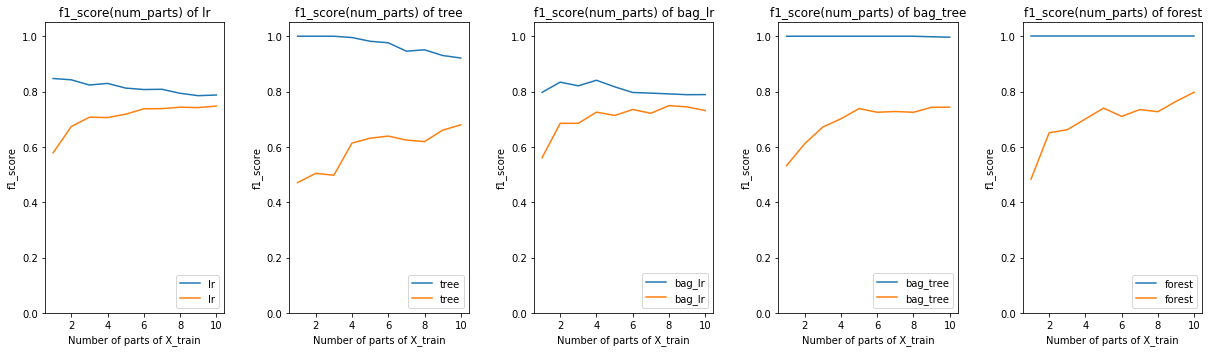

In [31]:
labels = ['lr', 'tree', 'bag_lr', 'bag_tree', 'forest']
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(17,5))
num_parts = np.arange(1, 11)
for i, label in enumerate(labels):
    axes[i].plot(num_parts, f1_score_train_all[i], label = label)
    axes[i].plot(num_parts, f1_score_test_all[i], label = label)
    axes[i].set_ylim([0, 1.05])
    axes[i].set_xlabel('Number of parts of X_train')
    axes[i].set_ylabel('f1_score')
    axes[i].legend(loc="lower right")
    axes[i].set_title('f1_score(num_parts) of ' + label)
    
fig.tight_layout()
plt.show()

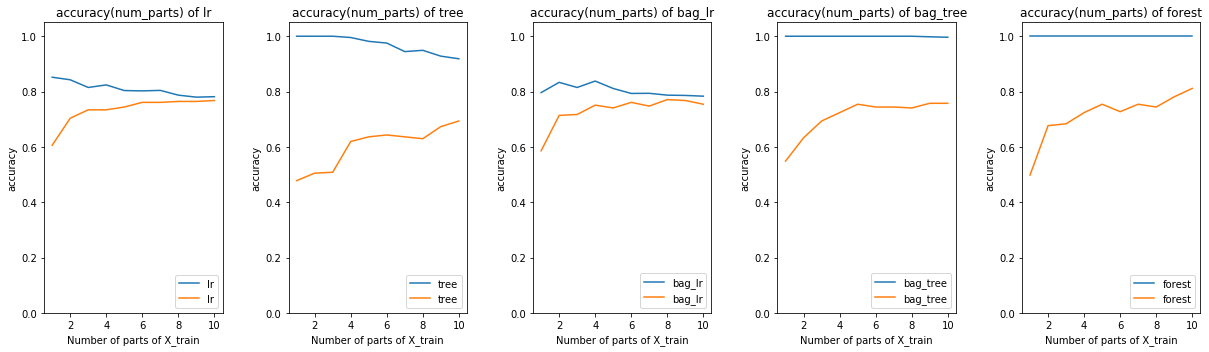

In [32]:
labels = ['lr', 'tree', 'bag_lr', 'bag_tree', 'forest']
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(17,5))

for i, label in enumerate(labels):
    axes[i].plot(num_parts, accuracy_train_all[i], label = label)
    axes[i].plot(num_parts, accuracy_test_all[i], label = label)
    axes[i].set_ylim([0, 1.05])
    axes[i].set_xlabel('Number of parts of X_train')
    axes[i].set_ylabel('accuracy')
    axes[i].legend(loc="lower right")
    axes[i].set_title('accuracy(num_parts) of ' + label)
    
fig.tight_layout()
plt.show()

* По полученным графикам понятно, что все модели дают приблизительно одинаковые результат, когда мало данных.
* При полном наборе данных лучшая модель = RandomForestClassifier
* Модели, основанные на деревьях, сильно переобучаются.